In [101]:
# read data
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import pandas as pd
import numpy as np

droptimes = [72120,79320,86520,106320]
dates = pd.date_range(start="2020-12-21",end="2021-01-06")

B = pd.read_csv('Sleep_Study-Bozie.csv').dropna(axis="columns", how='all') 
R = pd.read_csv('Sleep_Study-Rani.csv').dropna(axis="columns", how='all')
P = pd.read_csv('Sleep_Study-Spike.csv').dropna(axis="columns", how='all')
K = pd.read_csv('Sleep_Study-Kamala.csv').dropna(axis="columns", how='all')
W = pd.read_csv('Sleep_Study-Swarna.csv').dropna(axis="columns", how='all')

Access = pd.read_excel("Daily Yard Access.xlsx", sheet_name="Yard Access")

In [102]:
Access = Access[Access["Time"]=="Night"]
Access = Access[Access["Date"].isin(dates)]

In [103]:
def converttime(string):
    (h, m, s) = string.split(':')
    if (int(h) < 12): h= int(h) + 24 
    return int(h) * 3600 + int(m) * 60 + int(s)

In [108]:
def plot_sleepdur(total,rec,access):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.hlines("Date", "Start T","Stop T",data=total,color="blue")
    ax.hlines("Date", "Start T","Stop T",data=rec,color="red")
    ax.vlines(droptimes,0,len(dates)-3,color="k")
    
    
    ax2 = fig.add_subplot(111, sharex=ax, frameon=False)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    plt.yticks(np.arange(17), access["Access"].to_numpy())
    plt.xticks((72000,79200,86400,93600,100800,108000), ('20:00', '22:00', '0:00', '2:00', '4:00','6:00'))

In [105]:
#B.loc[:,'Start DTime'] = pd.to_datetime(B.Date + ' '+ B["Start Time"])

## Bozie

In [109]:
%%capture 
B["Start T"] = [0]*len(B)
B["Stop T"] = [0]*len(B)
for i,x in B.iterrows():
    B["Start T"][i] = converttime(x["Start Time"])
    B["Stop T"][i] = converttime(x["Stop Time"])
    
B_down = B[B["Rest/Recumbent"] == "Recumbent"]

B_Access = Access[Access["Group"].str.contains("B")].reset_index() 

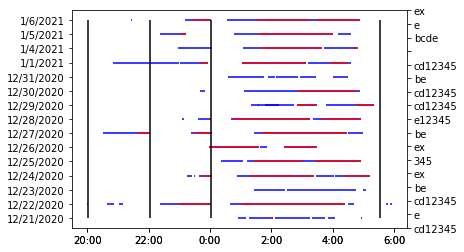

In [110]:
plot_sleepdur(B,B_down,B_Access)

## Rani

In [23]:
%%capture
R["Start T"] = [0]*len(R)
R["Stop T"] = [0]*len(R)
for i,x in R.iterrows():
    R["Start T"][i] = converttime(x["Start Time"])
    R["Stop T"][i] = converttime(x["Stop Time"])
    
R_down = R[R["Rest/Recumbent"] == "Recumbent"]

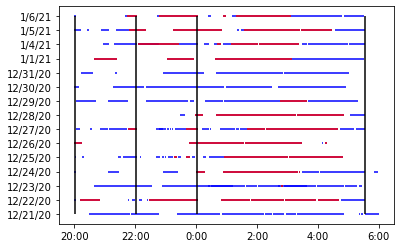

In [24]:
plot_sleepdur(R,R_down)

## Spike

In [25]:
%%capture
P["Start T"] = [0]*len(P)
P["Stop T"] = [0]*len(P)
for i,x in P.iterrows():
    print(i)
    P["Start T"][i] = converttime(x["Start Time"])
    P["Stop T"][i] = converttime(x["Stop Time"])
    
P_down = P[P["Rest/Recumbent"] == "Recumbent"]

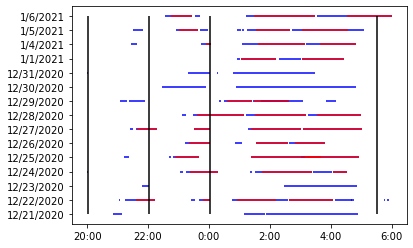

In [26]:
plot_sleepdur(P,P_down)

## Kamala

In [27]:
%%capture
K["Start T"] = [0]*len(K)
K["Stop T"] = [0]*len(K)
for i,x in K.iterrows():
    print(i)
    K["Start T"][i] = converttime(x["Start Time"])
    K["Stop T"][i] = converttime(x["Stop Time"])
    
K_down = K[K["Rest/Recumbent"] == "Recumbent"]

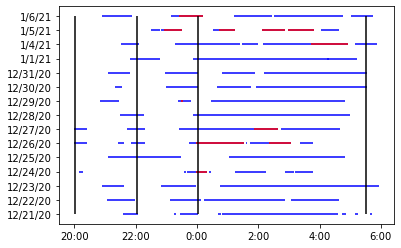

In [28]:
plot_sleepdur(K,K_down)

In [35]:
%%capture
W["Start T"] = [0]*len(W)
W["Stop T"] = [0]*len(W)
for i,x in W.iterrows():
    print(i)
    W["Start T"][i] = converttime(x["Start Time"])
    W["Stop T"][i] = converttime(x["Stop Time"])
    
W_down = W[W["Rest/Recumbent"] == "Recumbent"]

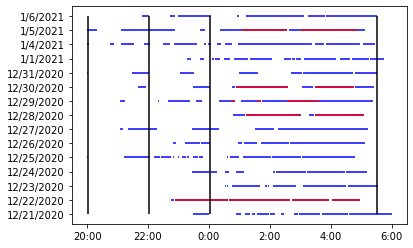

In [36]:
plot_sleepdur(W,W_down)